<a href="https://colab.research.google.com/github/annyannyanny/annyannyanny/blob/main/Model_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import required libraries/function and load the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential




In [ ]:
np.random.seed(0)

In [ ]:
CPI = pd.read_csv('CPI_train.csv')
CPI['Quarter'] = pd.to_datetime(CPI['Quarter'])
CPI.set_index ('Quarter',inplace = True)


CPI_not_scaled = CPI.values
CPI_not_scaled = CPI_not_scaled.astype('float')

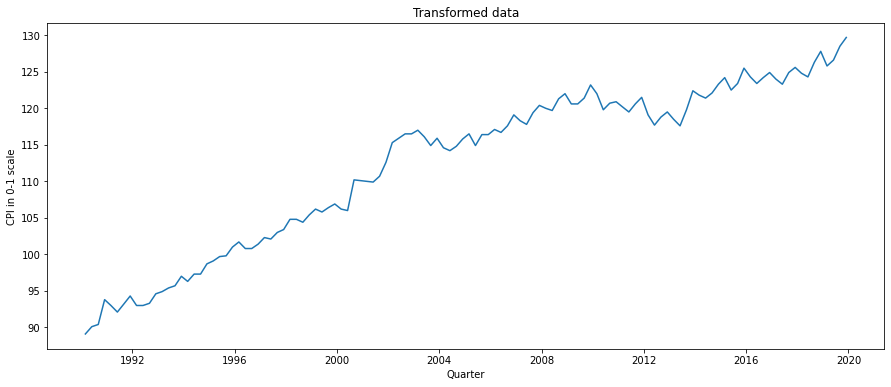

In [ ]:
# Plot the scaled data
plt.figure(figsize=(15,6))
plt.plot(CPI.index,CPI_not_scaled)
plt.xlabel('Quarter')
plt.ylabel('CPI in 0-1 scale')
plt.title('Transformed data')
plt.show()

## NN Data Pre-processing and train/test split



In [ ]:
time_window = 4 #the determined lag 4

scaler = MinMaxScaler(feature_range = (0,1))

# Compute in-sample and out-of-sample size
train_size = int((len(CPI)-8))
validation_size = 8

# Fitting the scaler
fitted_transformer = scaler.fit(CPI[:train_size+time_window])

# Transforming using trained scaler
CPI_scaled = fitted_transformer.transform(CPI)

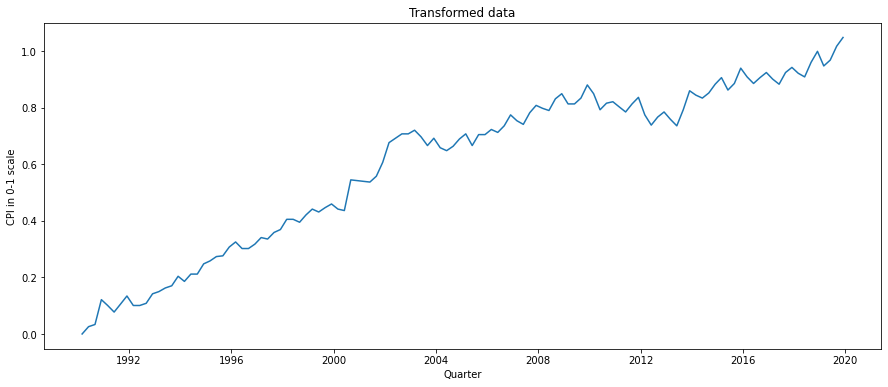

In [ ]:
# Plot the scaled data
plt.figure(figsize=(15,6))
plt.plot(CPI.index,CPI_scaled)
plt.xlabel('Quarter')
plt.ylabel('CPI in 0-1 scale')
plt.title('Transformed data')
plt.show()

In [ ]:
# Pre-allocation
X_CPI,Y_CPI =[],[]
X_CPI_not_scaled,Y_CPI_not_scaled = [],[]

# Use each rolling window as a row in the data matrix
for i in range(time_window, len(CPI_scaled)):
    X_CPI.append(CPI_scaled[i-time_window:i, 0])
    X_CPI_not_scaled.append(CPI_not_scaled[i-time_window:i,0])

    Y_CPI.append(CPI_scaled[i, 0])
    Y_CPI_not_scaled.append(CPI_not_scaled[i,0])

# Convert them from list to array
X_CPI = np.array(X_CPI)
Y_CPI = np.array(Y_CPI)
X_CPI_not_scaled = np.array(X_CPI_not_scaled)
Y_CPI_not_scaled= np.array(Y_CPI_not_scaled)

# Training data
X_CPI_train = X_CPI[:train_size, :]
Y_CPI_train = Y_CPI[:train_size]
X_CPI_train.shape

# Testing data
X_CPI_test = X_CPI[-validation_size:,:]
Y_CPI_test = Y_CPI[-validation_size:]
X_CPI_test.shape

(8, 4)

### Define the Feed Forward NN Model

In [ ]:
model = Sequential()
model.add(Dense(20, input_dim = time_window, activation='relu'))
model.add(Dense(1))

## Compile

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_92 (Dense)            (None, 20)                100       
                                                                 
 dense_93 (Dense)            (None, 1)                 21        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


## Train the Feed Forward NN Model

In [ ]:
model.fit(X_CPI_train, Y_CPI_train, epochs=500, batch_size=16 , verbose=1)

Epoch 1/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0896
Epoch 2/500
7/7 [==============================] - 0s 2ms/step - loss: 0.0490
Epoch 3/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0204
Epoch 4/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 5/500
7/7 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 0.0017
Epoch 7/500
7/7 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 8/500
7/7 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 9/500
7/7 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 10/500
7/7 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 11/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 12/500
7/7 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 13/500
7/7 [==============================] - 0s 2ms/st

In [ ]:
print(len(X_CPI_train))
print(len(X_CPI_test))

112
8


## One-step-ahead forecast



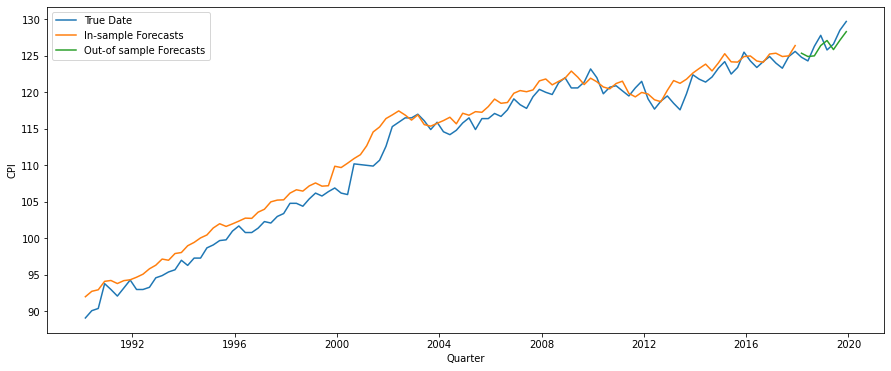

In [ ]:
#In-sample and out of sample forecast
CPI_predict = model.predict(X_CPI)

# Transform the forecast values to original scale
CPI_predictplot = scaler.inverse_transform(CPI_predict)

#Extract in-sample forecast in original scale
Predict_in = CPI_predictplot[:train_size]

#Extract out-of-sample forecast in original scale
Predict_out = CPI_predictplot[-validation_size:]

plt.figure(figsize=(15,6))
plt.plot(CPI.index,scaler.inverse_transform(CPI_scaled),label='True Date')
plt.plot(CPI.index[-(train_size+validation_size):-validation_size],Predict_in,label = 'In-sample Forecasts')
plt.plot(CPI.index[-validation_size:],Predict_out,label='Out-of sample Forecasts')
plt.xlabel('Quarter')
plt.ylabel('CPI')
plt.legend()
plt.show()

In [ ]:
import math
train_RMSE = math.sqrt(mean_squared_error(Y_CPI_not_scaled[:train_size],CPI_predictplot[:train_size,0]))
Validation_RMSE = math.sqrt(mean_squared_error(Y_CPI_not_scaled[train_size:],CPI_predictplot[train_size:,0]))

print('Training Data RMSE: {0:.4f}'.format(train_RMSE))
print('Test Data RMSE: {0:.4f}'.format(Validation_RMSE))

Training Data RMSE: 0.9793
Test Data RMSE: 1.2303


### RNN - LSTM

## Import required libraries/functions and load the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.layers import Dense,LSTM,Activation
from tensorflow.keras.models import Sequential


In [ ]:
np.random.seed(0)

In [ ]:
CPI = pd.read_csv('CPI_train.csv')
CPI['Quarter'] = pd.to_datetime(CPI['Quarter'])
CPI.set_index ('Quarter',inplace = True)


CPI_not_scaled = CPI.values
CPI_not_scaled = CPI_not_scaled.astype('float')

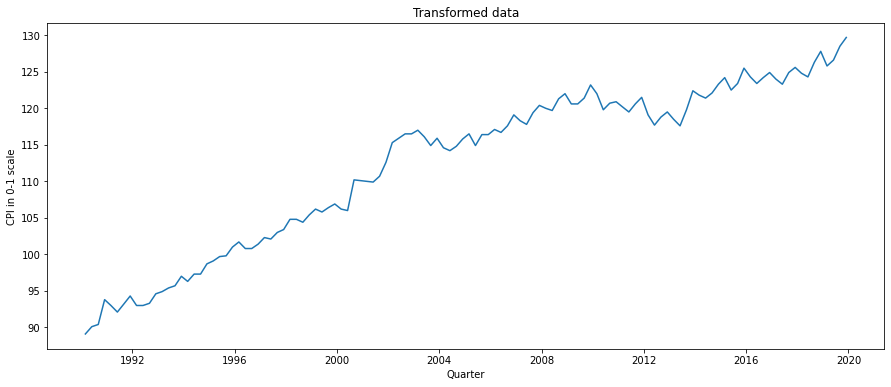

In [ ]:
# Plot the scaled data
plt.figure(figsize=(15,6))
plt.plot(CPI.index,CPI_not_scaled)
plt.xlabel('Quarter')
plt.ylabel('CPI in 0-1 scale')
plt.title('Transformed data')
plt.show()

## RNN Data Pre-processing and train/test split

In [ ]:
time_window = 4 #the determined lag 4

scaler = MinMaxScaler(feature_range = (0,1))

# Compute in-sample and out-of-sample size
train_size = int((len(CPI)-8))
validation_size = 8

# Fitting the scaler
fitted_transformer = scaler.fit(CPI[:train_size+time_window])

# Transforming using trained scaler
CPI_scaled = fitted_transformer.transform(CPI)

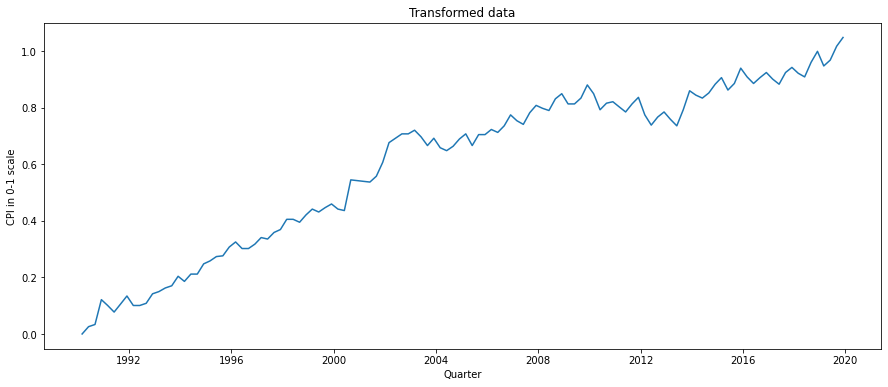

In [ ]:
# Plot the scaled data
plt.figure(figsize=(15,6))
plt.plot(CPI.index,CPI_scaled)
plt.xlabel('Quarter')
plt.ylabel('CPI in 0-1 scale')
plt.title('Transformed data')
plt.show()

In [ ]:
# Pre-allocation
X_CPI,Y_CPI =[],[]
X_CPI_not_scaled,Y_CPI_not_scaled = [],[]

# Use each rolling window as a row in the data matrix
for i in range(time_window, len(CPI_scaled)):
    X_CPI.append(CPI_scaled[i-time_window:i, 0])
    X_CPI_not_scaled.append(CPI_not_scaled[i-time_window:i,0])

    Y_CPI.append(CPI_scaled[i, 0])
    Y_CPI_not_scaled.append(CPI_not_scaled[i,0])

# Convert them from list to array
X_CPI = np.array(X_CPI)
Y_CPI = np.array(Y_CPI)
X_CPI_not_scaled = np.array(X_CPI_not_scaled)
Y_CPI_not_scaled= np.array(Y_CPI_not_scaled)

# Training data
X_CPI_train = X_CPI[:train_size, :]
Y_CPI_train = Y_CPI[:train_size]

# Testing data
X_CPI_test = X_CPI[-validation_size:,:]
Y_CPI_test = Y_CPI[-validation_size:]

## Recurrent NN and LSTM

In [ ]:

X_CPI_train = np.reshape(X_CPI_train, (X_CPI_train.shape[0],time_window,1))
print(X_CPI_train.shape)

X_CPI_test = np.reshape(X_CPI_test, (X_CPI_test.shape[0],time_window,1))
print(X_CPI_test.shape)

(112, 4, 1)
(8, 4, 1)


In [ ]:
model = Sequential()
model.add(LSTM(input_shape = (time_window,1),
               units = 32,
               activation= 'relu',
               return_sequences = False))
model.add(Dense(units=1))


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 32)                4352      
                                                                 
 dense_98 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


## Train RNN Model with Early Stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_loss', patience=50,verbose =1)

In [ ]:
model.fit(X_CPI_train,Y_CPI_train,
          batch_size=32,
          epochs = 500,
          validation_split = 0.05,
          shuffle = False,
          verbose = 1,
          callbacks = [early_stop])

Epoch 1/500
4/4 [==============================] - 1s 72ms/step - loss: 0.4041 - val_loss: 0.8279
Epoch 2/500
4/4 [==============================] - 0s 13ms/step - loss: 0.3664 - val_loss: 0.7592
Epoch 3/500
4/4 [==============================] - 0s 11ms/step - loss: 0.3315 - val_loss: 0.6945
Epoch 4/500
4/4 [==============================] - 0s 9ms/step - loss: 0.2992 - val_loss: 0.6336
Epoch 5/500
4/4 [==============================] - 0s 9ms/step - loss: 0.2696 - val_loss: 0.5766
Epoch 6/500
4/4 [==============================] - 0s 9ms/step - loss: 0.2417 - val_loss: 0.5222
Epoch 7/500
4/4 [==============================] - 0s 10ms/step - loss: 0.2156 - val_loss: 0.4703
Epoch 8/500
4/4 [==============================] - 0s 9ms/step - loss: 0.1904 - val_loss: 0.4193
Epoch 9/500
4/4 [==============================] - 0s 9ms/step - loss: 0.1662 - val_loss: 0.3698
Epoch 10/500
4/4 [==============================] - 0s 9ms/step - loss: 0.1431 - val_loss: 0.3216
Epoch 11/500
4/4 [=======

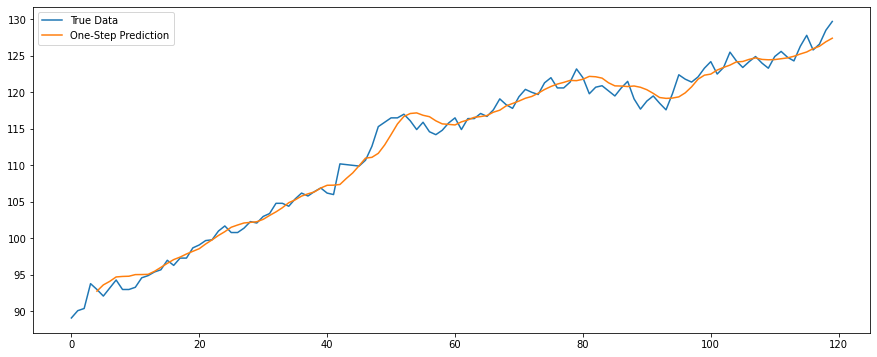

training set RMSE: 1.19
validation set RMSE: 1.40


In [ ]:
# Predicting
allPredict = model.predict(np.reshape(X_CPI, (X_CPI.shape[0],time_window,1)))

#Transforming to original scale
allPredict_original_scale = scaler.inverse_transform(allPredict)
allPredictPlot = np.empty_like(CPI_scaled)
allPredictPlot[:, :] = np.nan
allPredictPlot[time_window:, :] = allPredict_original_scale

# Plot true and in-sample forecast values
plt.figure(figsize=(15,6))
plt.plot(scaler.inverse_transform(CPI_scaled), label='True Data')
plt.plot(allPredictPlot, label='One-Step Prediction')
plt.legend()
plt.show()

# Checking training and test score
import math
trainScore = math.sqrt(mean_squared_error(Y_CPI_not_scaled[:train_size],allPredict_original_scale[:train_size,0]))
testScore = math.sqrt(mean_squared_error(Y_CPI_not_scaled[train_size:],allPredict_original_scale[train_size:,0]))

print('training set RMSE: {0:.2f}'.format(trainScore))
print('validation set RMSE: {0:.2f}'.format(testScore))

### Dynamic forecast with LSTM

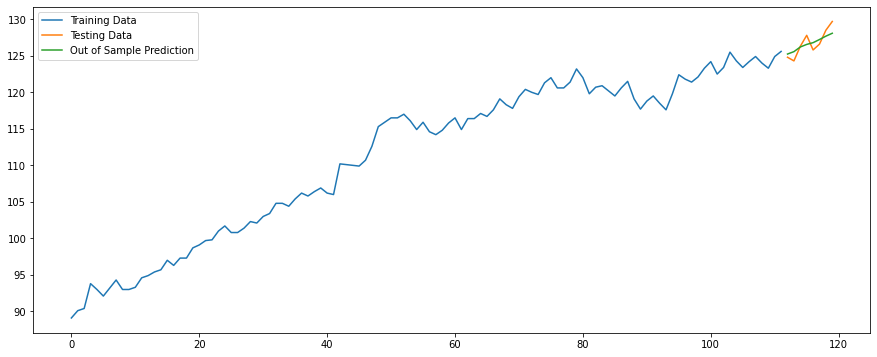

Dynamic Forecast RMSE: 1.00


In [ ]:
#Dynamical Prediction
dynamic_prediction = np.copy(CPI_scaled[:len(CPI_scaled) - validation_size])

for i in range(len(CPI_scaled) - validation_size, len(CPI_scaled)):
    last_feature = np.reshape(dynamic_prediction[i-time_window:i], (1,time_window,1))
    next_pred = model.predict(last_feature)
    dynamic_prediction = np.append(dynamic_prediction, next_pred)

# Transform forecast values to original scale
dynamic_prediction = dynamic_prediction.reshape(-1,1)
dynamic_prediction_original_scale = scaler.inverse_transform(dynamic_prediction)

# Plot
test_index = np.arange(len(CPI_scaled) - validation_size, len(CPI_scaled), 1)

plt.figure(figsize=(15,6))
plt.plot(scaler.inverse_transform(CPI_scaled[:len(CPI_scaled) - validation_size]), label='Training Data')
plt.plot(test_index, scaler.inverse_transform(CPI_scaled[-validation_size:]), label='Testing Data')
plt.plot(test_index, dynamic_prediction_original_scale[-validation_size:], label='Out of Sample Prediction')
plt.legend(loc = "upper left")
plt.show()

# Compute RMSE score on test data
testScore = math.sqrt(mean_squared_error(Y_CPI_not_scaled[-validation_size:],dynamic_prediction_original_scale[-validation_size:]))
print('Dynamic Forecast RMSE: {0:.2f}'.format(testScore))